Package assignments per drone: {0: [(3, 15), (10, 4), (8, 8)], 1: [(15, 10)]}
Total delivery time: 59


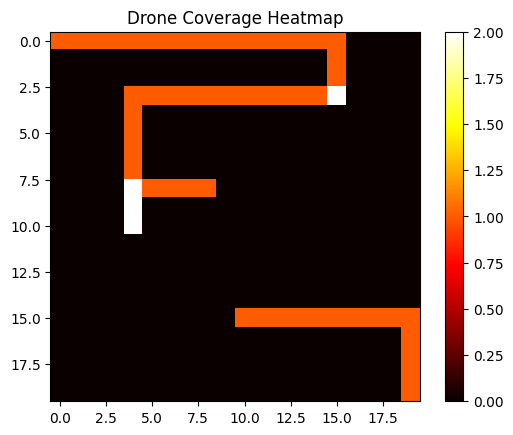

In [1]:
import heapq
import numpy as np
import matplotlib.pyplot as plt

# ---------------- A* Search ----------------
def astar(grid, start, goal):
    R, C = grid.shape
    pq = [(0, start)]
    g = {start: 0}
    parent = {start: None}

    def h(a, b):
        return abs(a[0]-b[0]) + abs(a[1]-b[1])  # Manhattan distance

    while pq:
        _, cur = heapq.heappop(pq)
        if cur == goal:
            path = []
            while cur:
                path.append(cur)
                cur = parent[cur]
            return path[::-1]

        r, c = cur
        for dr, dc in [(1,0),(-1,0),(0,1),(0,-1)]:
            nr, nc = r+dr, c+dc
            if 0<=nr<R and 0<=nc<C and grid[nr][nc]==0:
                newg = g[cur] + 1
                if (nr,nc) not in g or newg < g[(nr,nc)]:
                    g[(nr,nc)] = newg
                    parent[(nr,nc)] = cur
                    heapq.heappush(pq, (newg + h((nr,nc), goal), (nr,nc)))

    return None  # no path

# ---------------- Simulation Setup ----------------
grid = np.zeros((20, 20))   # empty grid (no obstacles)
drones = [(0,0), (19,19)]   # starting corners
packages = [(3,15), (10,4), (15,10), (8,8)]  # package locations

heatmap = np.zeros_like(grid)
total_time = 0

# Greedy assignment: nearest drone takes the package
assign = {0: [], 1: []}
for pkg in packages:
    d0 = abs(drones[0][0]-pkg[0]) + abs(drones[0][1]-pkg[1])
    d1 = abs(drones[1][0]-pkg[0]) + abs(drones[1][1]-pkg[1])
    assign[0 if d0 < d1 else 1].append(pkg)

# ---------------- Run Deliveries ----------------
for i, start_pos in enumerate(drones):
    pos = start_pos
    for pkg in assign[i]:
        path = astar(grid, pos, pkg)
        for r, c in path:
            heatmap[r][c] += 1
        total_time += len(path)
        pos = pkg

# ---------------- Output ----------------
print("Package assignments per drone:", assign)
print("Total delivery time:", total_time)

plt.imshow(heatmap, cmap="hot")
plt.title("Drone Coverage Heatmap")
plt.colorbar()
plt.show()